# 🕹️ Data Description

- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 제작한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

# 데이터 및 라이브러리 불러오기

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df_origin = pd.read_csv('vgames2.csv')
df_origin.head()

Saving vgames2.csv to vgames2 (1).csv


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# EDA 
1. 필요 없는 열 제거
2. 결측치 제거
3. `Year`의 자료형을 정수형으로 변환
4. `Year`의 이상치 변경
5. `Sales` 열의 문자를 제거하고 `flaoat` 자료형으로 변환
6. `Total` 컬럼을 추가
7. 데이터의 final version을 저장

### 필요 없는 열 제거

In [55]:
df = df_origin.copy() # 원본 복사

df.drop('Unnamed: 0', axis=1, inplace=True)

# 컬럼 순서 변경
df = df[['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] 
df.columns

Index(['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

### 결측치 제거

In [56]:
df.dropna(inplace=True)
df.isnull().sum()

Year           0
Name           0
Platform       0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### `Year`의 자료형을 정수형으로 변환

In [57]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int64')

In [58]:
# 연도순으로 정렬
df.sort_values('Year', inplace=True)
df['Year'].unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

### `Year`의 이상치 변경
- 0~20인 경우 2,000을 더한다.
- 21이상 100밑으로는 1,900을 더한다.

In [59]:
# 연도를 바꿔주는 함수
def change_year(y):
  if y <= 20:
    return y + 2000
  elif 20 < y < 100:
    return y + 1900
  else:
    return y

df['Year'] = df['Year'].apply(change_year)
# 순서 정렬
df = df.sort_values('Year').reset_index(drop=True)
df.Year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

### `Sales` 열의 문자를 제거하고 `flaoat` 자료형으로 변환

In [60]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].replace('[A-Z]', '0', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### `Total` 컬럼을 추가

In [61]:
df['Total'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df.head()

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,1980,Missile Command,2600,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1,1980,Checkers,2600,Misc,Atari,0.22,0.01,0.0,0.00,0.23
2,1980,Boxing,2600,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
3,1980,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,1980,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27


### 데이터의 final version을 저장

In [62]:
df.to_csv('vgames2_edited.csv', index=False)

# 지역에 따른 게임 트렌드
1. 장르에 따른 통합 출구량 확인
2. 수평 막대 그래프로 시각화
3. `Genre`별로 그룹화 하여 지역별 총 출구량을 확인
4. 수직 막대 그래프 시각화
5. 분석 내용



### 장르에 따른 통합 출구량 확인

In [63]:
genre_global = df.groupby('Genre')['Total'].sum()
# 순서정렬
genre_global = genre_global.sort_values()
genre_global

Genre
Puzzle            1440.61
Adventure         5733.47
Strategy         12971.70
Fighting         25641.02
Sports           45600.91
Platform         52322.84
Simulation       53283.99
Role-Playing     58895.71
Misc             63373.44
Shooter          64718.38
Racing           67915.83
Action          134999.65
Name: Total, dtype: float64

### 수평 막대 그래프로 시각화

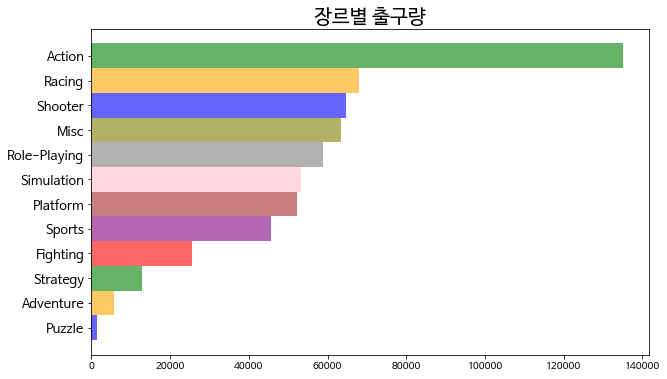

In [103]:
label = genre_global.index
index = np.arange(len(label)) # 0 ~ 11

plt.figure(figsize=(10,6))
plt.barh(index, list(genre_global), color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'], alpha=0.6, height=1);
plt.yticks(index, label, fontsize=13);
plt.title('장르별 출구량', fontsize=20);

### `Genre`별로 그룹화 하여 지역별 총 출구량을 확인

In [65]:
genre_local = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
genre_local

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,71151.72,42709.42,11855.43,9283.08
Adventure,2801.52,1463.52,651.81,816.62
Fighting,8319.54,13998.51,1886.96,1436.01
Misc,37990.97,21606.01,2403.95,1372.51
Platform,33542.07,13099.34,2230.32,3451.11
Puzzle,821.51,550.42,56.24,12.44
Racing,55249.21,6534.39,2656.06,3476.17
Role-Playing,12417.55,483.06,38639.10,7356.00
Shooter,27071.83,33706.89,438.14,3501.52


### 수직 막대 그래프 시각화

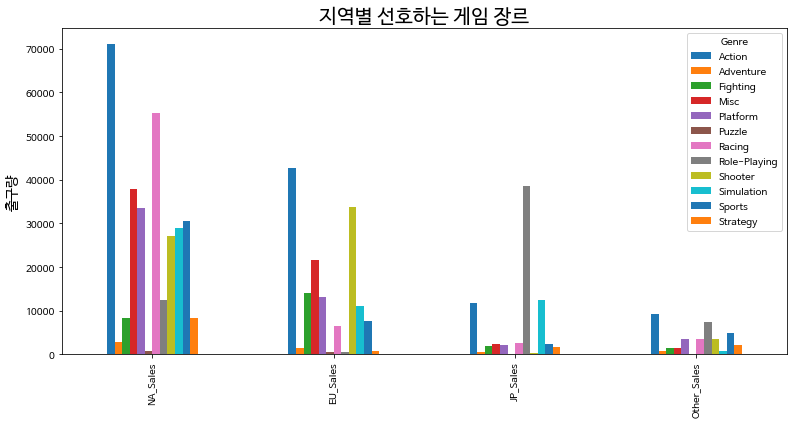

In [66]:
# 한글 폰트 지정(한글 깨짐 방지)
plt.rc('font', family='NanumBarunGothic') 

genre_local.T.plot.bar(figsize=(13,6));
plt.title('지역별 선호하는 게임 장르', fontsize=20)
plt.ylabel('출구량', fontsize=14);

### 분석 내용
- 전 세계적으로 가장 있기있는 게임 장르는 `Action`이라 할 수 있다. 무려 두번째로 출고량이 높은 `Racing`의 두 배에 달한다. 
- 하지만 일본에서만큼은 약세를 보이며, 일본 한정 `Role-Playing`이 강세이다.

# 연도 포함 세분화 과정
1. Line 차트로 시각화
2. 분석 내용

In [67]:
# 그룹화
genre_year = df.groupby(['Year', 'Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total'].sum().reset_index()

genre_year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,1980,Action,0.32,0.02,0.0,0.00,0.34
1,1980,Fighting,0.72,0.04,0.0,0.01,0.77
2,1980,Misc,2.53,0.15,0.0,0.02,2.70
3,1980,Shooter,6.56,0.43,0.0,0.08,7.07
4,1981,Action,13.86,1100.70,0.0,0.12,1114.68


### Line 차트로 시각화

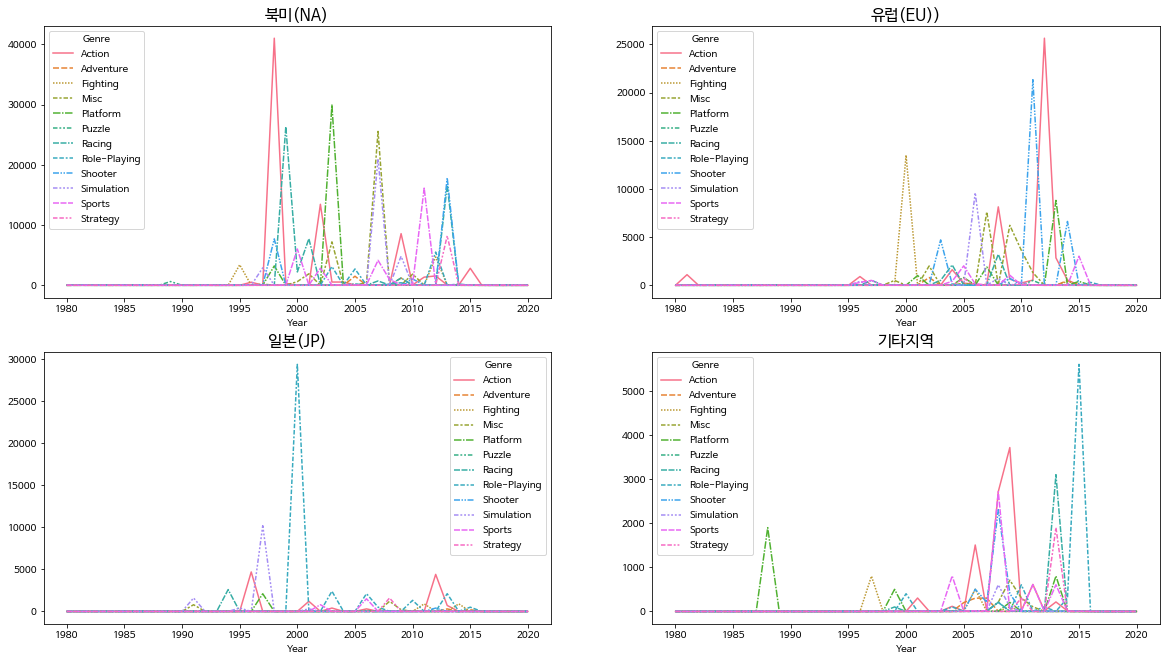

In [74]:
# pivot table로 변경
genre_NA = genre_year.pivot(index='Year', columns='Genre', values='NA_Sales').fillna(0)
genre_EU = genre_year.pivot(index='Year', columns='Genre', values='EU_Sales').fillna(0)
genre_JP = genre_year.pivot(index='Year', columns='Genre', values='JP_Sales').fillna(0)
genre_OTH = genre_year.pivot(index='Year', columns='Genre', values='Other_Sales').fillna(0)

plt.figure(figsize=(20, 11))

plt.subplot(2, 2, 1)
sns.lineplot(data=genre_NA)
plt.title('북미(NA)', fontsize=16)

plt.subplot(2, 2, 2)
sns.lineplot(data=genre_EU)
plt.title('유럽(EU))', fontsize=16)

plt.subplot(2, 2, 3)
sns.lineplot(data=genre_JP)
plt.title('일본(JP)', fontsize=16)

plt.subplot(2, 2, 4)
sns.lineplot(data=genre_OTH)
plt.title('기타지역', fontsize=16);

### 분석 내용
- 북미(NA)의 게임 장르는 `Action`이 가장 우세해 보였지만 연도별 차트를 봤을 때, `Racing`이 최근 트렌드에 더 적합한 것으로 보인다.
- 유럽(EU)의 최근 트렌드는 `Action`과 `Shooter`게임이다.
- 일본은 `Role_Playing`이 가장 인기가 많았지만 예전만하지 못하고, 글로벌 흐름에 따라 `Action`도 수요가 많다.
- 그 외 기타지역에서는 `Role-Playing`이 대세 게임 장르라 볼 수 있다.

# 연도별 게임 트렌드
1. `genre_year`을 10년 단위로 나누기
2. 차트의 매개변수에 놓일 함수 만들기
3. Pie 차트로 트렌드 분석(10년 주기)
4. 분석 내용

### `genre_year`을 10년 단위로 나누기
- 2020년도 데이터는 2010년대로 포함

In [69]:
genre_year_ten = genre_year.copy()

for i in range(10):
  genre_year_ten['Year'].replace(1980+i, '80', inplace=True)
  genre_year_ten['Year'].replace(1990+i, '90', inplace=True)
  genre_year_ten['Year'].replace(2000+i, '00', inplace=True)
  genre_year_ten['Year'].replace(2010+i, '10', inplace=True)
  
genre_year_ten['Year'].replace(2020, '10', inplace=True)

# 1년 단위로 그룹화된 것을 10년 단위로 다시 그룹화 한다.
genre_year_sum = genre_year_ten.groupby(['Year', 'Genre'])['Total'].sum().reset_index()
# 마찬가지로 pivot table로 바꿔준다.
gys_pivot = genre_year_sum.pivot(index='Year', columns='Genre', values='Total').fillna(0)
# 인덱스 재배열
gys_pivot = gys_pivot.reindex(['80', '90', '00', '10'])
gys_pivot

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
80,1150.99,4.78,7.24,8.44,2022.07,662.69,12.10,15.25,59.77,0.51,31.78,0.00
90,47534.41,44.80,4323.09,1563.28,6008.29,38.94,29645.86,182.77,7768.12,15550.49,946.39,57.51
00,44548.76,4523.15,14329.85,54473.13,34172.75,217.85,18436.20,41908.05,9332.56,37361.93,23900.50,2379.59
10,41765.49,1160.74,6980.84,7328.59,10119.73,521.13,19821.67,16789.64,47557.93,371.06,20722.24,10534.60


### 차트의 매개변수에 놓일 함수 만들기
- 함수의 매개변수 `data`는 데이터의 행 한줄씩으로 할 것임.
- 데이터셋에서 차지하는 비중이 5% 미만이면 기타항목 `ETC`로 분류한다.
- 비중이 5% 이상인 항목들만 구성하여 최종적으로 시리즈 형태로 반환한다.

In [70]:
def ratio_table(data):
  etc = 0
  new_dict = dict()
  for (i, e) in enumerate(data):
    ratio = e / data.sum()
    if ratio < 0.05:
      etc += e
    else:
      # 비중이 5%가 넘는 항목들만 포함
      new_dict[data.index[i]] = e
  # 5% 미만인 것들을 합쳐서 기타항목으로 구성
  new_dict['ETC'] = etc  
  return pd.Series(new_dict)

### Pie 차트로 트렌드 분석(10년 주기)




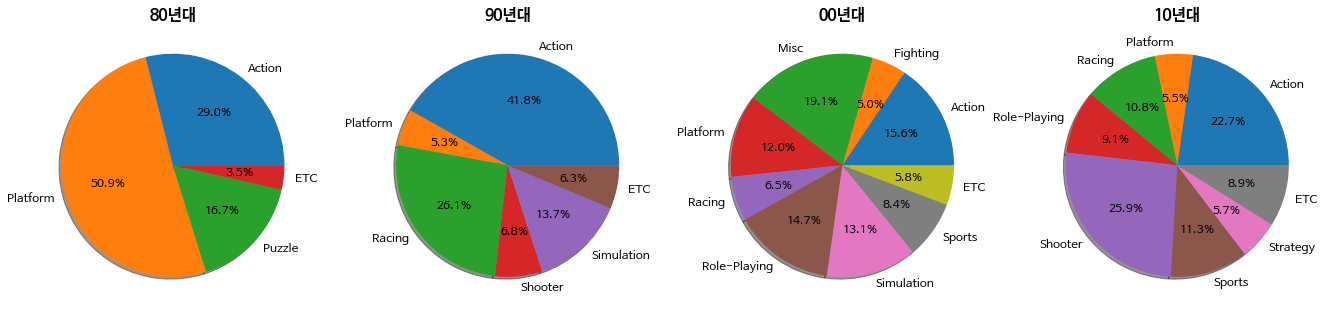

In [71]:
plt.figure(figsize=(23, 14))

for e in range(4):
  plt.subplot(1, 4, e+1)
  ratio = ratio_table(gys_pivot.iloc[e])
  textprops = dict(size=12, weight=3)
  plt.pie(x=ratio, labels=ratio.index, autopct='%.1f%%', shadow=True, textprops=textprops);
  plt.title(f'{gys_pivot.index[e]}년대', fontsize=16, fontweight='bold')

### 분석 내용
- 전체 데이터셋을 놓고 보면 `Action` 장르의 게임이 글로벌 트렌드라 볼 수 있었지만, 10주기로 보면 `Shooter`도 만만치 않게 수요가 높다는 것을 알 수 있다.
- 게임 산업이 발전함에 따라 다양한 장르의 게임을 즐기는 이용자들이 많아지는 추세이다.

# 평균으로 다시 분석해보자

In [72]:
# 평균으로 그룹화
genre_year_mean = genre_year_ten.groupby(['Year', 'Genre'])['Total'].mean().reset_index()
gym_pivot = genre_year_mean.pivot(index='Year', columns='Genre', values='Total').fillna(0)
gym_pivot = gym_pivot.reindex(['80', '90', '00', '10'])
gym_pivot

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
80,115.09900,2.390000,2.413333,1.688000,224.674444,94.670,2.420000,3.8125,5.977000,0.1700,3.531111,0.000000
90,4753.44100,4.977778,480.343333,173.697778,600.829000,3.894,2964.586000,18.2770,863.124444,1555.0490,94.639000,6.390000
00,4454.87600,452.315000,1432.985000,5447.313000,3417.275000,21.785,1843.620000,4190.8050,933.256000,3736.1930,2390.050000,237.959000
10,5220.68625,165.820000,997.262857,1046.941429,1445.675714,86.855,2831.667143,2098.7050,6793.990000,46.3825,2960.320000,1504.942857


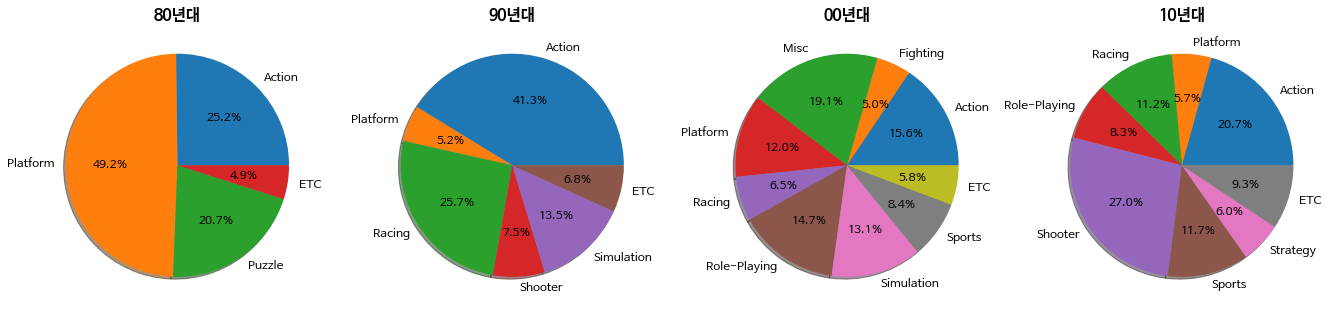

In [73]:
plt.figure(figsize=(23, 14))

for e in range(4):
  plt.subplot(1, 4, e+1)
  ratio = ratio_table(gym_pivot.iloc[e])
  textprops = dict(size=12, weight=3)
  plt.pie(x=ratio, labels=ratio.index, autopct='%.1f%%', shadow=True, textprops=textprops);
  plt.title(f'{gym_pivot.index[e]}년대', fontsize=16, fontweight='bold')

### `Action`과 `Shooter`의 차이는 유의미한가?
- 귀무가설($H_0$): $ \mu_{shooter} \leq \mu_{action} $
- 대립가설($H_a$): $ \mu_{shooter} > \mu_{action} $

In [102]:
action = df.query('Year >= 2010')[df.Genre=='Action']['Total'].reset_index(drop=True)
shooter = df.query('Year >= 2010')[df.Genre=='Shooter']['Total'].reset_index(drop=True)

tt = stats.ttest_ind(a=shooter, b=action, alternative='greater')
print('P-value:', round(tt.pvalue, 3))

P-value: 0.038


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 분석 내용
- 10년대 파이 차트를 주목해보면 출구량의 합계일 경우의 차트와 비교했을 때, `Action`과 `Shooter`의 차이가 더 벌어졌음을 알 수 있다.
- p값이 0.05보다 작아 귀무가설을 기각하고 대립가설을 채택한다. 즉 `shooter`의 출고량 평균은 `action`의 출고량 평균보다 유의미하게 크다고 볼 수 있다.
- 이는 곧 `Action`장르의 공급량이 출고량에 비해 많다는 의미이며, 평균적으로 높은 출고량을 기록한 `Shooter`가 시장 진출에 더 유리할 것으로 보인다.